In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [44]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [45]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [46]:
print(f'species shape: {species.shape}')
print(f'observations shape: {observations.shape}')

species shape: (5824, 4)
observations shape: (23296, 3)


In [47]:
print(f'Number of Species: {species.scientific_name.nunique()}')

Number of Species: 5541


In [48]:
print(f'The number of catergories is: {species.category.nunique()}')
print(f'The catergories are: {species.category.unique()}')

The number of catergories is: 7
The catergories are: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [49]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [50]:
print(f'The number of conservation status: {species.conservation_status.nunique()}')
print(f'The conversation status consist of: {species.conservation_status.unique()}')

The number of conservation status: 4
The conversation status consist of: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [51]:
print(species.groupby('conservation_status').size())
print(f'na number: {species.conservation_status.isna().sum()}')

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
na number: 5633


In [52]:
print(f'Number of National Parks: {observations.park_name.nunique()}')
print(f'The parks are: {observations.park_name.unique()}')

Number of National Parks: 4
The parks are: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [53]:
print(f'Total number of observations: {observations.observations.sum()}')

Total number of observations: 3314739


In [54]:
species.fillna('No Intervention', inplace=True)
species.groupby('conservation_status').size()


conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

In [55]:
conservationCategory = species[species.conservation_status != 'No Intervention']\
    .groupby(['conservation_status','category'])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


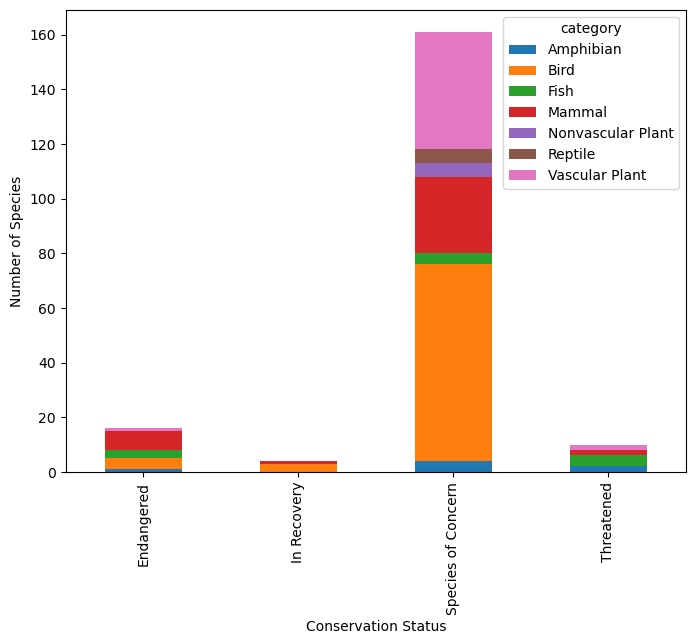

In [56]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species');




In [57]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [58]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts


,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [59]:
category_counts['percent_protected'] = category_counts.protected / \
                                    (category_counts.protected + category_counts.not_protected) * 100

category_counts



,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [60]:
#for the mammals and birds
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
               [75, 413]]

chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

In [61]:
#for the mammal and reptiles

contingency2 =[[30, 146],
              [5, 73]]

chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

In [62]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]




[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [63]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

cleanRows[:6]



[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [64]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]


['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [65]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns = ['Word', 'Count']).sort_values('Count', ascending = False).head(10)






,Word,Count
63,Bat,23
198,Shrew,18
159,Myotis,17
26,Mouse,16
110,Chipmunk,13
137,American,12
162,Squirrel,12
132,Vole,11
49,Eastern,11
193,Western,10


In [66]:
species['is_bat'] = species.common_names.str.contains(r'\bBat\b', regex = True)

species.head(10)



,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [67]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


In [69]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations



,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
2,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No Intervention,False,True
3,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
4,Lasiurus borealis,Yosemite National Park,134,Mammal,"Eastern Red Bat, Red Bat",No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Eptesicus fuscus,Bryce National Park,72,Mammal,Big Brown Bat,Species of Concern,True,True
140,Eptesicus fuscus,Bryce National Park,72,Mammal,"Big Brown Bat, Big Brown Bat",Species of Concern,True,True
141,Myotis leibii,Yellowstone National Park,233,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Lasionycteris noctivagans,Bryce National Park,128,Mammal,Silver-Haired Bat,Species of Concern,True,True


In [70]:
bat_observations.groupby('park_name').observations.sum().reset_index()



,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [72]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park



,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


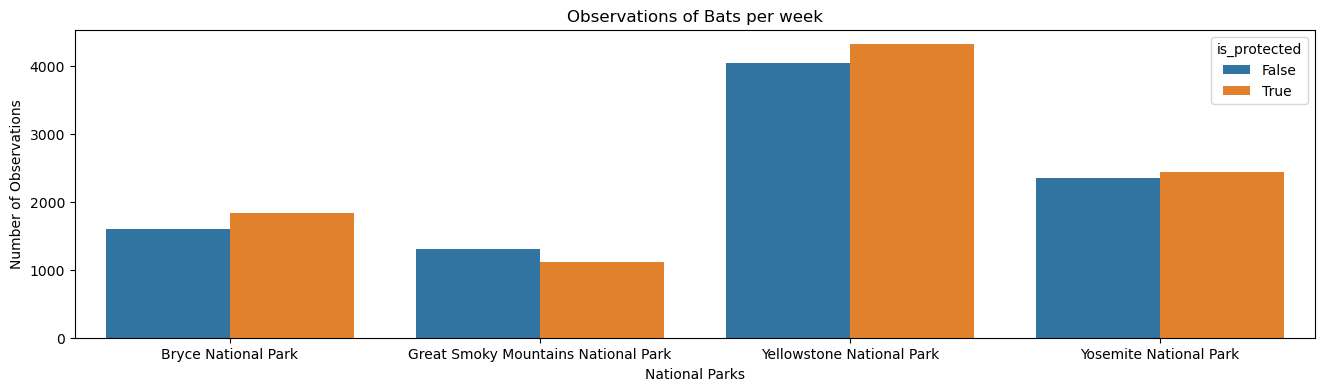

In [74]:
plt.figure(figsize=(16,4))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per week')
plt.show()

